# Water Quality EDA

Pedro Costa nº:2020242456

António Sousa nª ...

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [63]:
data = pd.read_csv(r'water_potability.csv')
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [64]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Pequena Descrição de Features

1. **pH** - pH da água.
2. **Hardness** - Capacidade de ocorrer precipitação.
3. **Solids** - Sólidos Dissolvidos.
4. **Chloramines** - Quantidade de cloraminas.
5. **Sulfates** - Quantidade de Sulfatos dissolvidos.
6. **Conductivity** - Condutividade da água.
7. **Organic Carbon** - Quantidade de carvão orgânico presente na água.
8. **Thrialomethanes** - Quantidade de Trialometanos.
9. **Turbidity** - Turbidez da água.
10. **Potability** - 1 no caso da água ser potável e 0 caso contrário.

Text(0.5, 1.0, 'Potability')

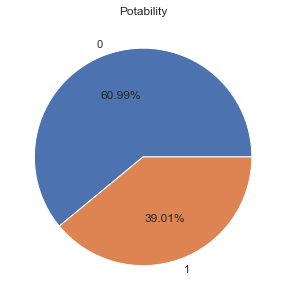

In [42]:
plt.figure(figsize=(10,5))
plt.pie(data['Potability'].value_counts(),labels=data['Potability'].unique(),autopct='%1.2f%%')
plt.title('Potability')

## Gráficos e Plots

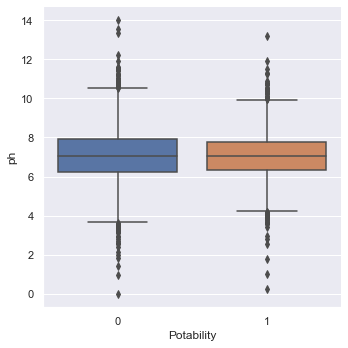

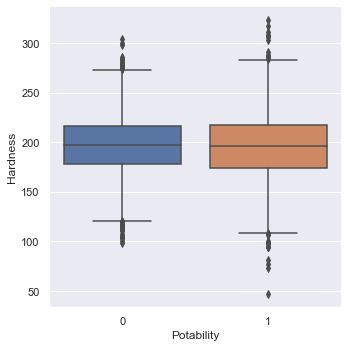

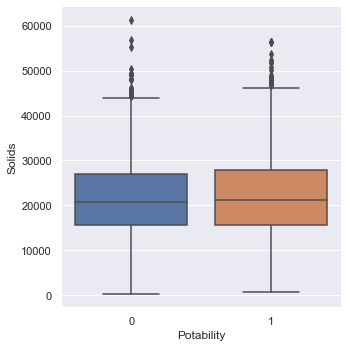

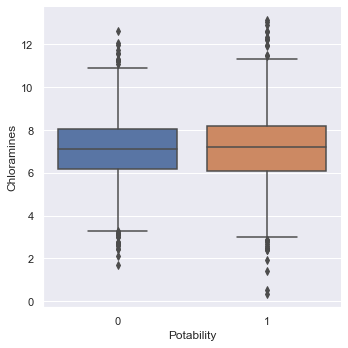

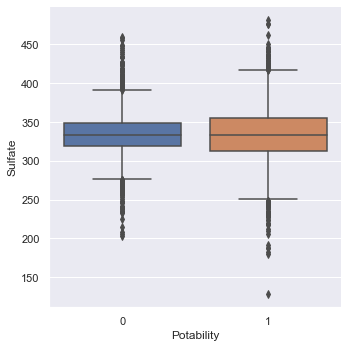

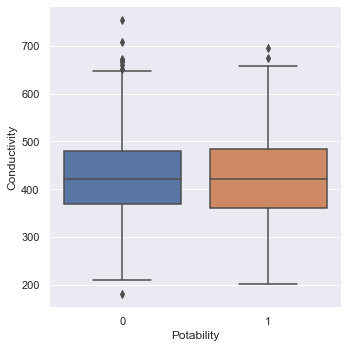

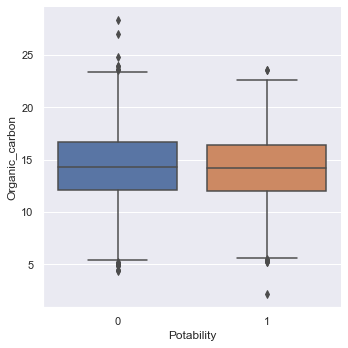

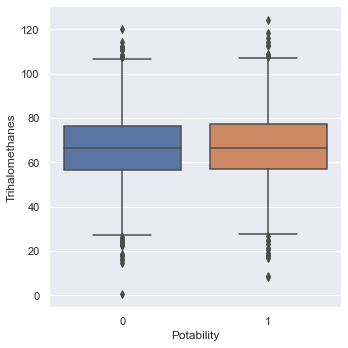

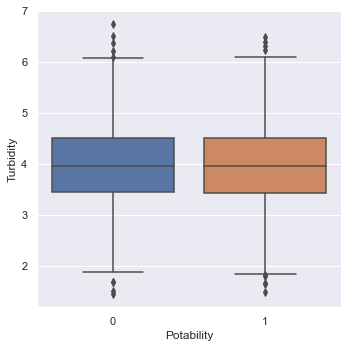

In [47]:
for column in data.columns:
    if(column != "Potability"):
        sns.catplot(x="Potability",y=column,data=data,kind="box")

C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pedro\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

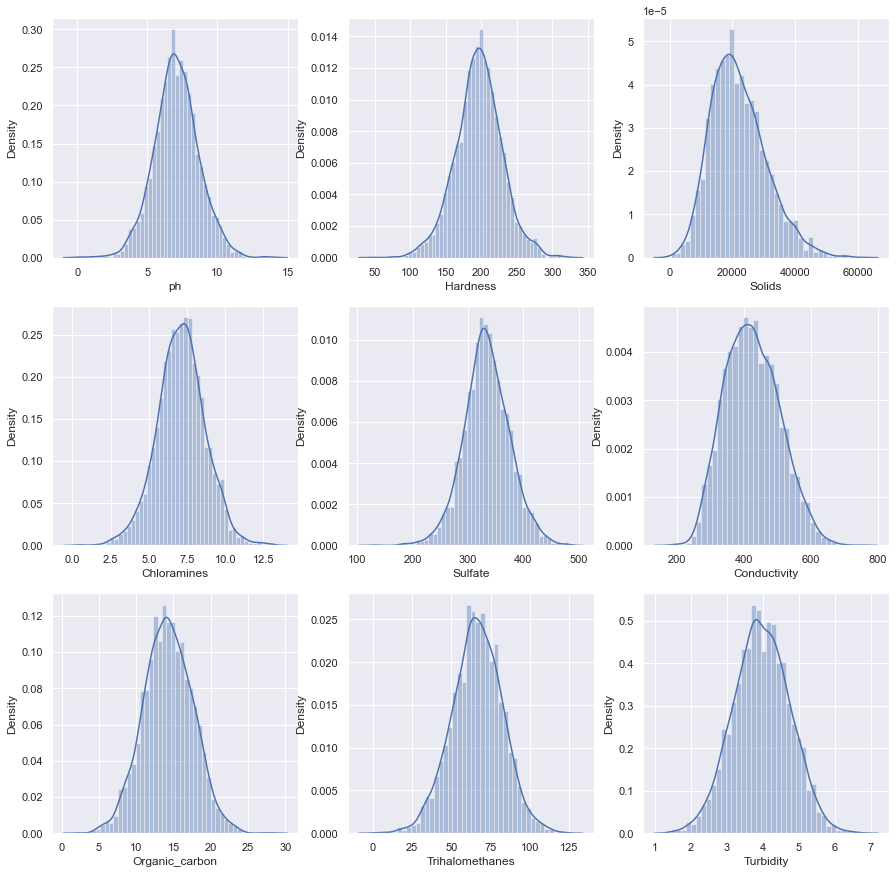

In [6]:
sns.set_theme(); np.random.seed(0)
fig,axes = plt.subplots(3,3)
axes = axes.flatten()
fig.set_size_inches(15,15)
for ax, col in zip(axes, data.columns):
  sns.distplot(data[col], ax = ax)


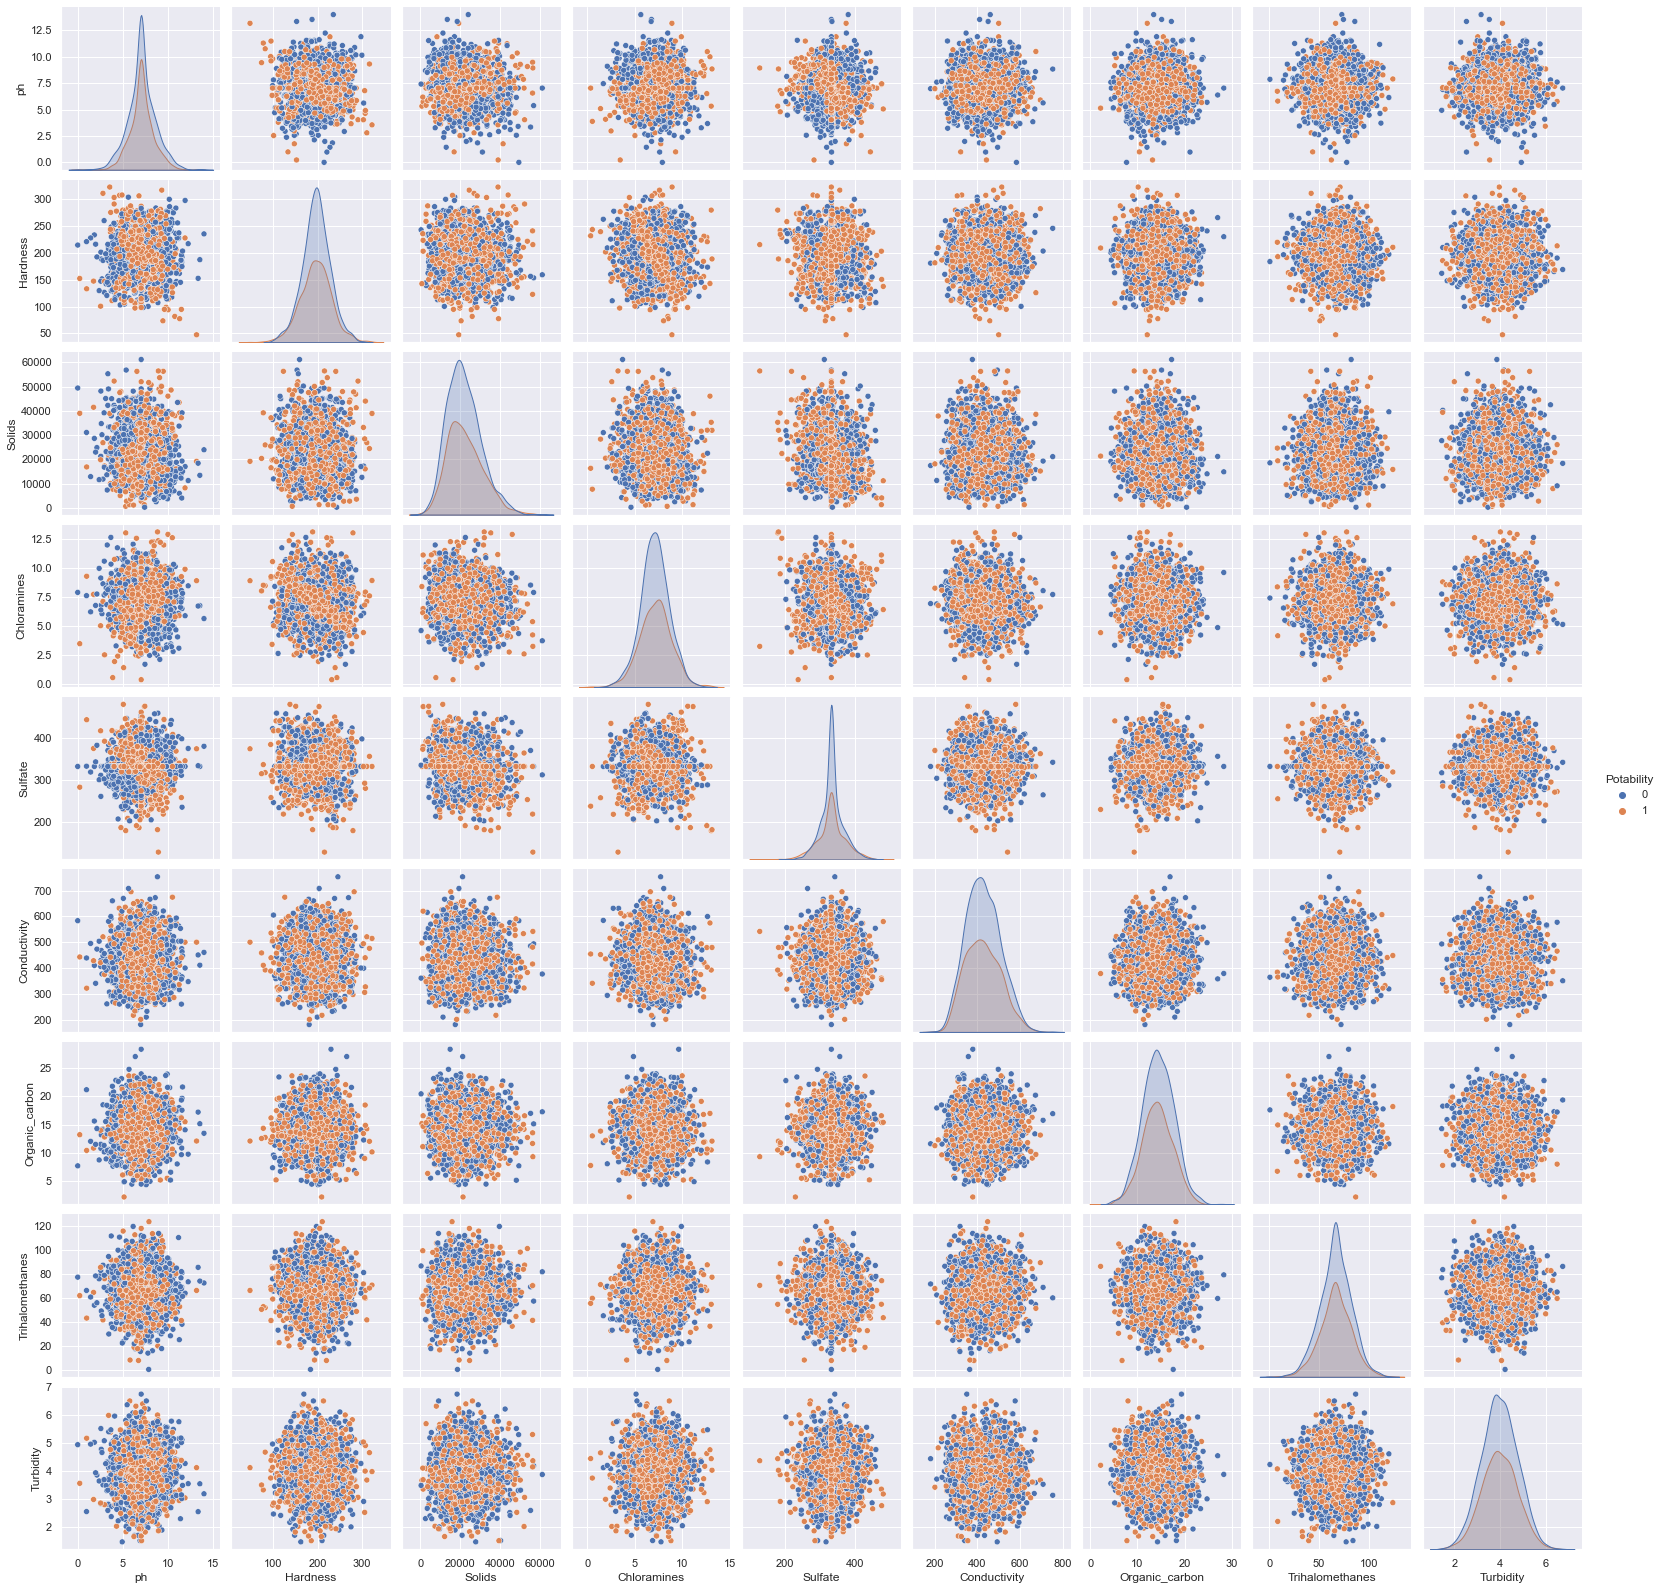

In [52]:
sns.pairplot(data,hue="Potability")

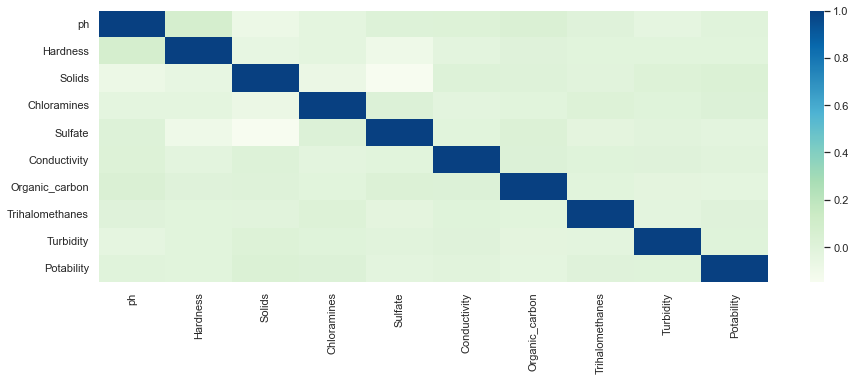

In [60]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),cmap="GnBu")

## Valores em falta


In [65]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Existem valores em falta nas colunas pH, Sulfatos e Trihalometanos. Como tanto no pH como nos Sulfatos temos muitos valores em falta, (13% e 23%) em vez de eleminarmos apenas os valores em falta, vamos substitui-los pela mediana. Podiámos também optar pela média, mas como neste caso ainda existe uma quantidade de outliers significativa optamos pela mediana. 

In [66]:
data['ph'].replace(np.nan,data['ph'].median(),inplace=True)
data['Sulfate'].replace(np.nan,data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].replace(np.nan,data['Trihalomethanes'].median(),inplace=True)

In [67]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Duplicados


In [68]:
duplicados = data.duplicated()
print(duplicados.sum())
data[duplicados]

0


Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

## Normalização 

In [79]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## SVC

In [86]:
clf = SVC(random_state=10)
clf.fit(X_train,y_train)

SVC(random_state=10)

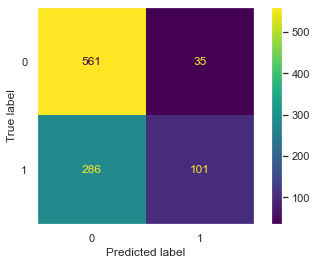

In [90]:
plot_confusion_matrix(clf,X_test,y_test)
plt.grid(False)

In [93]:
y_pred = clf.predict(X_test)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6734486266531028
Precision: 0.7426470588235294
Recall: 0.26098191214470284
